In [1]:
import numpy
from matplotlib import pylab
import convolve,SBModels
import pylens,MassModels
import indexTricks as iT
from math import log10,ceil
from SampleOpt import AMAOpt,Sampler
from scipy import optimize
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
zp_1s = float(25.94)
ep = 30000
max_ep = 1000
pix_num = 3000

mag_src1 = 24.5
mag_src2 = 24.2
mag_src3 = 25.0
mag_src4 = 25.1
mag_src5 = 24.7
mag_src6 = 22.7
mag_src7 = 23.9
mag_src8 = 23.5
mag_src9 = 24.4
mag_src10 = 24.8

mag_lens1 = 20.69
mag_lens2 = 18.8
mag_lens3 = 22.2
mag_lens4 = 21.5
mag_lens5 = 21.9
mag_lens6 = 20.7
mag_lens7 = 20.4
mag_lens8 = 19.7
mag_lens9 = 21.5
mag_lens10 = 22.0
mag_lens11 = 23.3
mag_lens12 = 24.1
mag_lens13 = 22.7
mag_lens14 = 21.9
mag_lens15 = 22.6
mag_lens16 = 23.5
mag_lens17 = 19.4
mag_lens18 = 19.6
mag_lens19 = 20.1
mag_lens20 = 19.5

In [3]:
zp = zp_1s+2.5*log10(ep)

src1 = SBModels.Sersic('src', {'x':1530.0,'y':1570.0,'re':4.6,'q':0.92,'pa':54.0,'n':1.3})
src2 = SBModels.Sersic('src', {'x':730.0,'y':890.0,'re':8.3,'q':0.52,'pa':4.0,'n':2.0})
src3 = SBModels.Sersic('src', {'x':1880.0,'y':939.0,'re':5.5,'q':0.71,'pa':-54.0,'n':2.3})
src4 = SBModels.Sersic('src', {'x':2280.0,'y':1090.0,'re':5.1,'q':0.88,'pa':120.0,'n':3.1})
src5 = SBModels.Sersic('src',{'x':1430.0,'y':1610.0,'re':6.1,'q':0.77,'pa':64.0,'n':2.8})
src6 = SBModels.Sersic('src', {'x':2180.0,'y':2169.0,'re':4.9,'q':0.83,'pa':-99.0,'n':3.3})
src7 = SBModels.Sersic('src', {'x':1442.0,'y':1488.0,'re':8.6,'q':0.76,'pa':-10.0,'n':3.4})
src8 = SBModels.Sersic('src', {'x':2290.0,'y':789.0,'re':5.2,'q':0.66,'pa':154.0,'n':2.7})
src9 = SBModels.Sersic('src', {'x':630.0,'y':2489.0,'re':4.4,'q':0.65,'pa':39.0,'n':1.5})
src10 = SBModels.Sersic('src', {'x':1670.0,'y':2059.0,'re':5.8,'q':0.73,'pa':-100.0,'n':1.9})

lensGal1 = SBModels.Sersic('lens', {'x':600.0,'y':600.0,'re':15.2,'q':0.61,'pa':-9.6,'n':4.0})
lensGal2 = SBModels.Sersic('lens', {'x':1500.0,'y':1500.0,'re':50.2,'q':0.91,'pa':200.6,'n':4.0})
lensGal3 = SBModels.Sersic('lens', {'x':1350.0,'y':750.0,'re':30.2,'q':0.51,'pa':32.6,'n':3.0})
lensGal4 = SBModels.Sersic('lens', {'x':2250.0,'y':1800.0,'re':18.2,'q':0.91,'pa':-80.6,'n':2.5})
lensGal5 = SBModels.Sersic('lens', {'x':900.0,'y':2100.0,'re':25.2,'q':0.81,'pa':180.6,'n':3.3})
lensGal6 = SBModels.Sersic('lens', {'x':1050.0,'y':450.0,'re':27.2,'q':0.41,'pa':-10.6,'n':2.9})
lensGal7 = SBModels.Sersic('lens', {'x':450.0,'y':2250.0,'re':20.2,'q':0.81,'pa':-200.6,'n':1.9})
lensGal8 = SBModels.Sersic('lens', {'x':2550.0,'y':900.0,'re':20.2,'q':0.38,'pa':20.6,'n':2.8})
lensGal9 = SBModels.Sersic('lens', {'x':1950.0,'y':1950.0,'re':20.2,'q':0.31,'pa':-110.6,'n':2.9})
lensGal10 = SBModels.Sersic('lens', {'x':1800.0,'y':1050.0,'re':19.2,'q':0.45,'pa':70.6,'n':2.9})
lensGal11 = SBModels.Sersic('lens', {'x':2000.0,'y':1750.0,'re':22.2,'q':0.65,'pa':50.6,'n':2.0})
lensGal12 = SBModels.Sersic('lens', {'x':2800.0,'y':2750.0,'re':18.2,'q':0.35,'pa':180.6,'n':1.9})
lensGal13 = SBModels.Sersic('lens', {'x':500.0,'y':1250.0,'re':20.8,'q':0.51,'pa':110.2,'n':2.5})
lensGal14 = SBModels.Sersic('lens', {'x':1000.0,'y':1350.0,'re':24.2,'q':0.63,'pa':-44.6,'n':2.8})
lensGal15 = SBModels.Sersic('lens', {'x':1270.0,'y':1750.0,'re':26.2,'q':0.66,'pa':10.6,'n':3.3})
lensGal16 = SBModels.Sersic('lens', {'x':1860.0,'y':1310.0,'re':35.2,'q':0.38,'pa':-10.6,'n':3.6})
lensGal17 = SBModels.Sersic('lens', {'x':1400.0,'y':1670.0,'re':40.2,'q':0.85,'pa':100.6,'n':3.9})
lensGal18 = SBModels.Sersic('lens', {'x':1620.0,'y':1590.0,'re':43.2,'q':0.80,'pa':280.6,'n':4.6})
lensGal19 = SBModels.Sersic('lens', {'x':1850.0,'y':1910.0,'re':40.5,'q':0.88,'pa':88.6,'n':4.2})
lensGal20 = SBModels.Sersic('lens', {'x':2189.0,'y':2166.0,'re':38.3,'q':0.77,'pa':-44.6,'n':4.1})

In [4]:
lensMag1 = lensGal1.Mag(zp)
lensMag2 = lensGal2.Mag(zp)
lensMag3 = lensGal3.Mag(zp)
lensMag4 = lensGal4.Mag(zp)
lensMag5 = lensGal5.Mag(zp)
lensMag6 = lensGal6.Mag(zp)
lensMag7 = lensGal7.Mag(zp)
lensMag8 = lensGal8.Mag(zp)
lensMag9 = lensGal9.Mag(zp)
lensMag10 = lensGal10.Mag(zp)
lensMag11 = lensGal11.Mag(zp)
lensMag12 = lensGal12.Mag(zp)
lensMag13 = lensGal13.Mag(zp)
lensMag14 = lensGal14.Mag(zp)
lensMag15 = lensGal15.Mag(zp)
lensMag16 = lensGal16.Mag(zp)
lensMag17 = lensGal17.Mag(zp)
lensMag18 = lensGal18.Mag(zp)
lensMag19 = lensGal19.Mag(zp)
lensMag20 = lensGal20.Mag(zp)

lensGal1.amp = 10.**(-0.4*(mag_lens1-lensMag1))
lensGal2.amp = 10.**(-0.4*(mag_lens2-lensMag2))
lensGal3.amp = 10.**(-0.4*(mag_lens3-lensMag3))
lensGal4.amp = 10.**(-0.4*(mag_lens4-lensMag4))
lensGal5.amp = 10.**(-0.4*(mag_lens5-lensMag5))
lensGal6.amp = 10.**(-0.4*(mag_lens6-lensMag6))
lensGal7.amp = 10.**(-0.4*(mag_lens7-lensMag7))
lensGal8.amp = 10.**(-0.4*(mag_lens8-lensMag8))
lensGal9.amp = 10.**(-0.4*(mag_lens9-lensMag9))
lensGal10.amp = 10.**(-0.4*(mag_lens10-lensMag10))
lensGal11.amp = 10.**(-0.4*(mag_lens11-lensMag11))
lensGal12.amp = 10.**(-0.4*(mag_lens12-lensMag12))
lensGal13.amp = 10.**(-0.4*(mag_lens13-lensMag13))
lensGal14.amp = 10.**(-0.4*(mag_lens14-lensMag14))
lensGal15.amp = 10.**(-0.4*(mag_lens15-lensMag15))
lensGal16.amp = 10.**(-0.4*(mag_lens16-lensMag16))
lensGal17.amp = 10.**(-0.4*(mag_lens17-lensMag17))
lensGal18.amp = 10.**(-0.4*(mag_lens18-lensMag18))
lensGal19.amp = 10.**(-0.4*(mag_lens19-lensMag19))
lensGal20.amp = 10.**(-0.4*(mag_lens20-lensMag20))

In [5]:
srcMag1 = src1.Mag(zp)
srcMag2 = src2.Mag(zp)
srcMag3 = src3.Mag(zp)
srcMag4 = src4.Mag(zp)
srcMag5 = src5.Mag(zp)
srcMag6 = src6.Mag(zp)
srcMag7 = src7.Mag(zp)
srcMag8 = src8.Mag(zp)
srcMag9 = src9.Mag(zp)
srcMag10 = src10.Mag(zp)

src1.amp = 10.**(-0.4*(mag_src1-srcMag1))
src2.amp = 10.**(-0.4*(mag_src2-srcMag2))
src3.amp = 10.**(-0.4*(mag_src3-srcMag3))
src4.amp = 10.**(-0.4*(mag_src4-srcMag4))
src5.amp = 10.**(-0.4*(mag_src5-srcMag5))
src6.amp = 10.**(-0.4*(mag_src6-srcMag6))
src7.amp = 10.**(-0.4*(mag_src7-srcMag7))
src8.amp = 10.**(-0.4*(mag_src8-srcMag8))
src9.amp = 10.**(-0.4*(mag_src9-srcMag9))
src10.amp = 10.**(-0.4*(mag_src10-srcMag10))

In [6]:
lensMass1 = MassModels.PowerLaw('lens', {'x':600.0,'y':600.0,'b':9.8,'q':0.61,'pa':-9.6,'eta':1.0})
lensMass2 = MassModels.PowerLaw('lens', {'x':1500.0,'y':1500.0,'b':45.8,'q':0.91,'pa':200.6,'eta':1.0})
lensMass3 = MassModels.PowerLaw('lens', {'x':1350.0,'y':750.0,'b':21.0,'q':0.51,'pa':32.6,'eta':1.0})
lensMass4 = MassModels.PowerLaw('lens', {'x':2250.0,'y':1800.0,'b':13.2,'q':0.91,'pa':-80.6,'eta':1.0})
lensMass5 = MassModels.PowerLaw('lens', {'x':900.0,'y':2100.0,'b':16.0,'q':0.81,'pa':180.6,'eta':1.0})
lensMass6 = MassModels.PowerLaw('lens', {'x':1050.0,'y':450.0,'b':19.0,'q':0.41,'pa':-10.6,'eta':1.0})
lensMass7 = MassModels.PowerLaw('lens', {'x':450.0,'y':2250.0,'b':12.2,'q':0.81,'pa':-200.6,'eta':1.0})
lensMass8 = MassModels.PowerLaw('lens', {'x':2550.0,'y':900.0,'b':12.0,'q':0.38,'pa':20.6,'eta':1.0})
lensMass9 = MassModels.PowerLaw('lens', {'x':1950.0,'y':1950.0,'b':13.1,'q':0.31,'pa':-110.6,'eta':1.0})
lensMass10 = MassModels.PowerLaw('lens', {'x':1800.0,'y':1050.0,'b':11.8,'q':0.45,'pa':70.6,'eta':1.0})
lensMass11 = MassModels.PowerLaw('lens', {'x':2000.0,'y':1750.0,'b':12.5,'q':0.65,'pa':50.6,'eta':1.0})
lensMass12 = MassModels.PowerLaw('lens', {'x':2800.0,'y':2750.0,'b':11.7,'q':0.35,'pa':180.6,'eta':1.0})
lensMass13 = MassModels.PowerLaw('lens', {'x':500.0,'y':1250.0,'b':12.1,'q':0.51,'pa':110.2,'eta':1.0})
lensMass14 = MassModels.PowerLaw('lens', {'x':1000.0,'y':1350.0,'b':14.4,'q':0.63,'pa':-44.6,'eta':1.0})
lensMass15 = MassModels.PowerLaw('lens', {'x':1270.0,'y':1750.0,'b':15.3,'q':0.66,'pa':10.6,'eta':1.0})
lensMass16 = MassModels.PowerLaw('lens', {'x':1860.0,'y':1310.0,'b':33.0,'q':0.38,'pa':-10.6,'eta':1.0})
lensMass17 = MassModels.PowerLaw('lens', {'x':1400.0,'y':1670.0,'b':39.6,'q':0.85,'pa':100.6,'eta':1.0})
lensMass18 = MassModels.PowerLaw('lens', {'x':1620.0,'y':1590.0,'b':42.8,'q':0.80,'pa':280.6,'eta':1.0})
lensMass19 = MassModels.PowerLaw('lens', {'x':1850.0,'y':1910.0,'b':42.2,'q':0.88,'pa':88.6,'eta':1.0})
lensMass20 = MassModels.PowerLaw('lens', {'x':2189.0,'y':2166.0,'b':41.1,'q':0.77,'pa':-44.6,'eta':1.0})

lensesGal1 = [lensMass1]
lensesGal2 = [lensMass2]
lensesGal3 = [lensMass3]
lensesGal4 = [lensMass4]
lensesGal5 = [lensMass5]
lensesGal6 = [lensMass6]
lensesGal7 = [lensMass7]
lensesGal8 = [lensMass8]
lensesGal9 = [lensMass9]
lensesGal10 = [lensMass10]
lensesGal11 = [lensMass11]
lensesGal12 = [lensMass12]
lensesGal13 = [lensMass13]
lensesGal14 = [lensMass14]
lensesGal15 = [lensMass15]
lensesGal16 = [lensMass16]
lensesGal17 = [lensMass17]
lensesGal18 = [lensMass18]
lensesGal19 = [lensMass19]
lensesGal20 = [lensMass20]

In [7]:
HaloMass = MassModels.PowerLaw('lens', {'x':1500.0,'y':1500.0,'b':1000.0,'q':1.0,'pa':0.0,'eta':1.0})
lensesHalo = [HaloMass]

In [8]:
psf_name = 'F814W.fits'
psf = fits.open(psf_name)[0].data
psf /= psf.sum()

In [9]:
y,x = iT.coords((pix_num,pix_num))
img,psf_fftd = convolve.convolve(lensGal1.pixeval(x,y),psf)
img += convolve.convolve(lensGal2.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal3.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal4.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal5.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal6.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal7.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal8.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal9.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal10.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal11.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal12.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal13.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal14.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal15.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal16.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal17.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal18.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal19.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(lensGal20.pixeval(x,y),psf_fftd,False)[0]

img += convolve.convolve(src1.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(x,y),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(x,y),psf_fftd,False)[0]

In [10]:
xl,yl = pylens.getDeflections(lensesHalo,[x,y])
img += convolve.convolve(src1.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src2.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src3.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src4.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src5.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src6.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src7.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src8.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src9.pixeval(xl,yl), psf_fftd, False)[0]
img += convolve.convolve(src10.pixeval(xl,yl), psf_fftd, False)[0]

In [11]:
xl_gal1,yl_gal1 = pylens.getDeflections(lensesGal1,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal1,yl_gal1),psf_fftd,False)[0]

In [12]:
xl_gal2,yl_gal2 = pylens.getDeflections(lensesGal2,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal2,yl_gal2),psf_fftd,False)[0]

In [13]:
xl_gal3,yl_gal3 = pylens.getDeflections(lensesGal3,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal3,yl_gal3),psf_fftd,False)[0]

In [14]:
xl_gal4,yl_gal4 = pylens.getDeflections(lensesGal4,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal4,yl_gal4),psf_fftd,False)[0]

In [15]:
xl_gal5,yl_gal5 = pylens.getDeflections(lensesGal5,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal5,yl_gal5),psf_fftd,False)[0]

In [16]:
xl_gal6,yl_gal6 = pylens.getDeflections(lensesGal6,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal6,yl_gal6),psf_fftd,False)[0]

In [17]:
xl_gal7,yl_gal7 = pylens.getDeflections(lensesGal7,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal7,yl_gal7),psf_fftd,False)[0]

In [18]:
xl_gal8,yl_gal8 = pylens.getDeflections(lensesGal8,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal8,yl_gal8),psf_fftd,False)[0]

In [19]:
xl_gal9,yl_gal9 = pylens.getDeflections(lensesGal9,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal9,yl_gal9),psf_fftd,False)[0]

In [20]:
xl_gal10,yl_gal10 = pylens.getDeflections(lensesGal10,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal10,yl_gal10),psf_fftd,False)[0]

In [21]:
xl_gal11,yl_gal11 = pylens.getDeflections(lensesGal11,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal11,yl_gal11),psf_fftd,False)[0]

In [22]:
xl_gal12,yl_gal12 = pylens.getDeflections(lensesGal12,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal12,yl_gal12),psf_fftd,False)[0]

In [23]:
xl_gal13,yl_gal13 = pylens.getDeflections(lensesGal13,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal13,yl_gal13),psf_fftd,False)[0]

In [24]:
xl_gal14,yl_gal14 = pylens.getDeflections(lensesGal14,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal14,yl_gal14),psf_fftd,False)[0]

In [25]:
xl_gal15,yl_gal15 = pylens.getDeflections(lensesGal15,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal15,yl_gal15),psf_fftd,False)[0]

In [26]:
xl_gal16,yl_gal16 = pylens.getDeflections(lensesGal16,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal16,yl_gal16),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal16,yl_gal16 ) ,psf_fftd,False)[0]

In [27]:
xl_gal17,yl_gal17 = pylens.getDeflections(lensesGal17,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal17,yl_gal17),psf_fftd,False)[0]

In [28]:
xl_gal18,yl_gal18 = pylens.getDeflections(lensesGal18,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal18,yl_gal18),psf_fftd,False)[0]

In [29]:
xl_gal19,yl_gal19 = pylens.getDeflections(lensesGal19,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal19,yl_gal19),psf_fftd,False)[0]

In [30]:
xl_gal20,yl_gal20 = pylens.getDeflections(lensesGal20,[x,y])
img += convolve.convolve(src1.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src2.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src3.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src4.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src5.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src6.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src7.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src8.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src9.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]
img += convolve.convolve(src10.pixeval(xl_gal20,yl_gal20),psf_fftd,False)[0]

TypeError: FigureCanvasPdf.print_pdf() got an unexpected keyword argument 'overwrite'

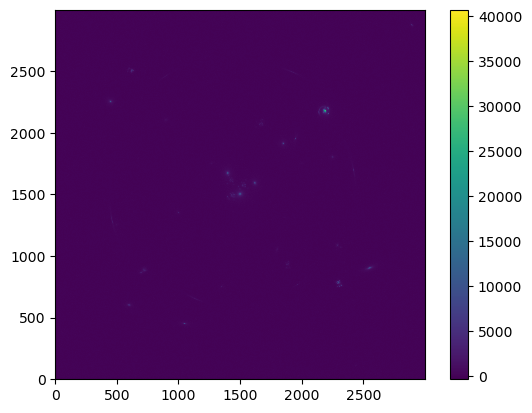

In [31]:
counts = numpy.array(img)

read_val = 4.2
read = numpy.zeros((pix_num,pix_num))
read[:,:] = read_val*read_val*(ceil(ep/max_ep))
read_array = numpy.array(read)

bg_val = 0.11
bg = numpy.zeros((pix_num,pix_num))
bg[:,:] = bg_val*ep
bg_array = numpy.array(bg)
variance = numpy.add(numpy.add(counts,read_array),bg_array)
noise = numpy.power(variance,0.5)

normal = numpy.random.randn(pix_num,pix_num)
normal_array = numpy.array(normal)
noise_random = noise*normal_array
img +=noise_random
counts_end = numpy.array(img)
fits.PrimaryHDU(img).writeto('report.fits',overwrite=True)
plt.imshow(img,origin='lower',interpolation='nearest')
plt.colorbar()
plt.savefig('report.pdf', dpi=200, overwrite=True)